# Value Iteration


In [70]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
import warnings

if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_
warnings.filterwarnings('ignore')

def query_environment(name):
  env = gym.make(name)
  spec = gym.spec(name)
  print(f"Action Space: {env.action_space}")
  print(f"Observation Space: {env.observation_space}")
  print(f"Max Episode Steps: {spec.max_episode_steps}")
  print(f"Nondeterministic: {spec.nondeterministic}")
  print(f"Reward Range: {env.reward_range}")
  print(f"Reward Threshold: {spec.reward_threshold}")

query_environment("FrozenLake-v1")

Action Space: Discrete(4)
Observation Space: Discrete(16)
Max Episode Steps: 100
Nondeterministic: False
Reward Range: (0, 1)
Reward Threshold: 0.7


In [96]:
def valueIteration(env, gamma=1.0, iteration=10000, eps=1e-20):
    value = np.zeros(16)
    # Start Iteration
    for i in range(iteration):
        previous_value = value.copy()
        for state in range(16):
            Q = []
            for action in range(4):
                outcomes  = []
                # TODO: Loop through all outcomes of performing that action and calculate the Q values
                for probability, nextstate, reward, done in env.P[state][action]:
                    outcomes.append(probability * (reward + gamma * previous_value[nextstate]))
                Q.append(np.sum(outcomes))
            # TODO: Calculate the value function
            value[state] = np.max(Q)
#        print(value)
        if (np.sum(np.fabs(previous_value - value)) <= eps):
            return value
    print("Iterated over %d Iterations and couldn't converge"%(iteration))
    return value

In [86]:
def calculatePolicy(env, v, gamma=1.0):
    value = v.copy()
    policy = np.zeros(16, dtype=int)
    for state in range(16):
        Q = []
        for action in range(4):
            # Reset all outcomes of this particular action
                outcomes  = []
                # TODO: Loop through all outcomes of performing that action and calculate the Q values
                for probability, nextstate, reward, done in env.P[state][action]:
#                    print(state, action, nextstate, probability, reward, done)
                    outcomes.append(probability * (reward + gamma * value[nextstate]))
                Q.append(np.sum(outcomes))
        # TODO: extract policy
        policy[state] = np.argmax(Q)
        #print(np.argmax(Q), policy[state], "Q: ", Q)
    # Step 9: Return policy
    return policy

In [87]:
def evaluatePolicyOnce(env, policy, gamma=1.0, eps=1e-20):
    totalReward = 0
    step = 0
    state, _ = env.reset()
    done = False
    discount = 1
    while not done:
        action = policy[state]
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        #print(f"Step {step}: State {state}, Action {action}, Reward {reward}, Done {done}")
        totalReward += reward * discount
        discount *= gamma
        step += 1
    return totalReward

def evaluatePolicy(env, policy, gamma=1.0, iteration=100, render=False, eps=1e-20):
    scores = [evaluatePolicyOnce(env, policy, gamma, eps) for _ in range(iteration)]
    return scores

In [75]:
def ValueIterator(env, gamma=1.0, improvementIterations=1000, evaluationIterations=100, eps=1e-20):
    startTime = time.time()
    optimalValue = valueIteration(env, gamma, improvementIterations, eps)
    policy = calculatePolicy(env, optimalValue, gamma)
    endTime = time.time()
    scores = evaluatePolicy(env, policy, gamma, evaluationIterations, eps)
    print('Mean score = %0.2f. Standard Deviation = %0.2f. Best score = %0.2f. Time taken = %4.4f seconds'%(np.mean(scores), np.std(scores), np.max(scores), endTime - startTime))
    print('Score obtained', scores)
    print('Mean score = %0.2f.'%(np.mean(scores)))
    print('Best score = %0.2f.'%(np.max(scores)))


In [94]:
gamma = 1.0
game = 'FrozenLake-v1'
#SFFF       (S: starting point, safe)
#FHFH       (F: frozen surface, safe)
#FFFH       (H: hole, fall to your doom)
#HFFG       (G: goal, where the frisbee is located)
improvementIterations = 10000
evaluationIterations = 100
eps = 1e-20
np.random.seed(0)
env = gym.make(game)
env.reset(seed=3547)
ValueIterator(env=env, gamma=gamma, evaluationIterations=evaluationIterations, improvementIterations=improvementIterations, eps=eps)

Mean score = 0.75. Standard Deviation = 0.43. Best score = 1.00. Time taken = 0.2579 seconds
Score obtained [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]
Mean score = 0.75.
Best score = 1.00.


In [142]:
class ValueIterationAgent:
    def __init__(self, env, gamma=1.0, iters=10000, eval_iters=100, eps=1e-20, seed=3547):
        self.env = env
        self.env.reset(seed=seed)
        self.gamma = gamma
        self.iters = iters
        self.eval_iters = eval_iters
        self.eps = eps
        self.num_states = env.observation_space.n
        self.num_actions = env.action_space.n
        self.Q = np.zeros((self.num_states, self.num_actions))
        self.time_cost = "Unknown"

    def value_iteration(self):
        self.value = np.zeros(self.num_states)
        # Start Iteration
        for i in range(self.iters):
            prev_value = self.value.copy()
            for state in range(self.num_states):
                Q = []
                for action in range(self.num_actions):
                    outcomes = []
                    for prob, next_state, reward, done in self.env.P[state][action]:
                        outcomes.append(prob * (reward + self.gamma * prev_value[next_state]))
                    Q.append(np.sum(outcomes))
                self.Q[state] = Q
                self.value[state] = np.max(Q)
            if (np.sum(np.fabs(prev_value - self.value)) <= self.eps):
                return self.value
        print("\033[31m[Warning]\033[0m Iterated over %d Iterations and couldn't converge"%(self.iters))
    
    def get_policy(self):
        self.policy = np.zeros(self.num_states, dtype=int)
        for state in range(self.num_states):
            Q = []
            for action in range(self.num_actions):
                outcomes = []
                for prob, next_state, reward, done in self.env.P[state][action]:
                    outcomes.append(prob * (reward + self.gamma * self.value[next_state]))
                Q.append(np.sum(outcomes))
            self.Q[state] = Q
            self.policy[state] = np.argmax(Q)

    def get_trajectory(self):
        tot_reward = 0
        discount = 1
        step, done = 0, False
        state, _ = self.env.reset()
        while not done:
            action = self.policy[state]
            state, reward, terminated, truncated, _ = self.env.step(action)
            done = terminated or truncated
            tot_reward += reward * discount
            discount *= self.gamma
            step += 1
        return tot_reward

    def eval_policy(self):
        scores = [self.get_trajectory() for _ in range(self.eval_iters)]
        self.mean_score = np.mean(scores)
        self.std_score = np.std(scores)
        self.best_score = np.max(scores)
        print("Mean score = %0.2f. Standard Deviation = %0.2f. Best score = %0.2f. Time taken = %4.4f seconds"%\
              (self.mean_score, self.std_score, self.best_score, self.time_cost))
    
    def run(self):
        startTime = time.time()
        self.value_iteration()
        self.get_policy()
        endTime = time.time()
        self.time_cost = endTime - startTime
        self.eval_policy()
    
    def plot_values(self):
        # Reshape the value function to a 4x4 grid for visualization
        value_sq = np.reshape(self.value, (4, 4))
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111)
        im = ax.imshow(value_sq, cmap='cool')
        for (j,i),label in np.ndenumerate(value_sq):
            ax.text(i, j, np.round(label, 5), ha='center', va='center', fontsize=14)
        plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
        plt.title('State-Value Function')
        plt.show()
    

Mean score = 0.78. Standard Deviation = 0.41. Best score = 1.00. Time taken = 0.2598 seconds
Optimal Policy:  [0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
Optimal Value:  [0.82352941 0.82352941 0.82352941 0.82352941 0.82352941 0.
 0.52941176 0.         0.82352941 0.82352941 0.76470588 0.
 0.         0.88235294 0.94117647 0.        ]


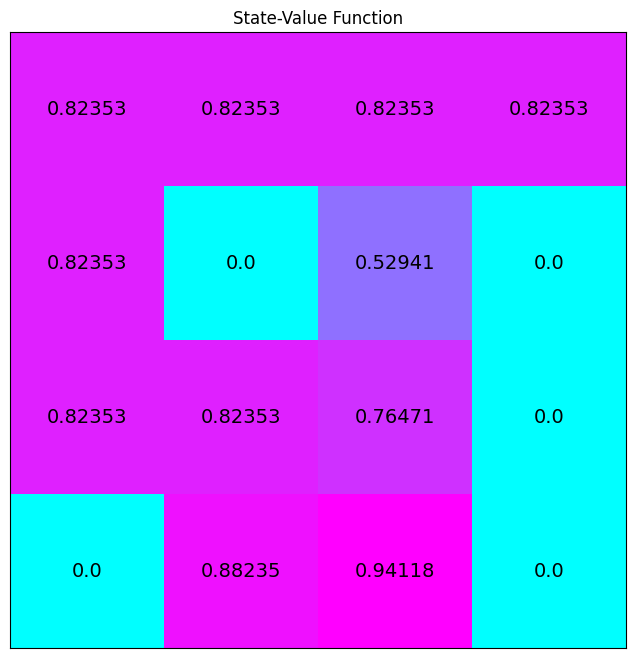

In [143]:
game = 'FrozenLake-v1'
VI = ValueIterationAgent(env=gym.make(game), gamma=1, iters=10000, eval_iters=100, eps=1e-20, seed=233333)
VI.run()
print("Optimal Policy: ", VI.policy)
print("Optimal Value: ", VI.value)
VI.plot_values()


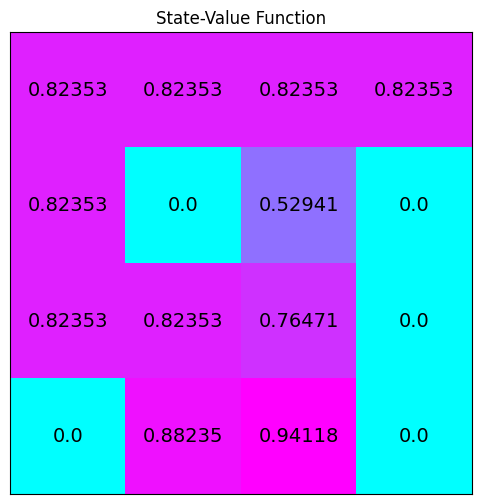

In [95]:
def plot_values(V):
	# reshape value function
	V_sq = np.reshape(V, (4,4))

	# plot the state-value function
	fig = plt.figure(figsize=(6, 6))
	ax = fig.add_subplot(111)
	im = ax.imshow(V_sq, cmap='cool')
	for (j,i),label in np.ndenumerate(V_sq):
	    ax.text(i, j, np.round(label, 5), ha='center', va='center', fontsize=14)
	plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
	plt.title('State-Value Function')
	plt.show()

optimalValue = valueIteration(env, gamma, improvementIterations, eps)
plot_values(optimalValue)